## Deep-MRIQC Labels

Here we're doing some basic processing on the human-provided image labels, to get a better idea of the distribution of data we're working with.

First, we'll do some standard imports.

In [17]:
%matplotlib inline

import collections
import pandas as pd
from nilearn import plotting

Then we'll look at a sample image to get an idea of what kind of data we're working with:

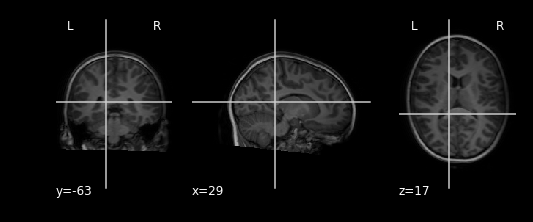

In [3]:
plotting.plot_anat('50576.nii.gz');

In [16]:
targets = pd.read_csv('targets.csv')
print("There are {} unique sites".format(len(targets.SITE.unique())))
print("The distribution of subjects by site is: ")
collections.Counter(targets.SITE)

There are 17 unique sites
The distribution of subjects by site is: 


Counter({'usm': 101,
         'ucla': 99,
         'pitt': 83,
         'sjh': 49,
         'um': 145,
         'nyu': 56,
         nan: 141,
         'caltech': 38,
         'mpg': 57,
         'stanford': 40,
         'kul': 64,
         'kki': 55,
         'ohsu': 26,
         'olin': 36,
         'sdsu': 36,
         'sbl': 30,
         'yale': 56})

Now we want to know how many images each rater labelled as "good," "bad," or "unsure."

In [19]:
print("Rater 1 labelled {} images overall.".format(len(targets.LABEL_1.dropna())))
print("Rater 2 labelled {} images overall.".format(len(targets.LABEL_2.dropna())))
print()
print("Rater 1 labelled {} images as 'good' or 'bad.'".format(len(targets[(targets.LABEL_1 == 1 | -1)])))
print("Rater 2 labelled {} images as 'good' or 'bad.'".format(len(targets[(targets.LABEL_2 == 1 | -1)])))

Rater 1 labelled 601 images
Rater 2 labelled 601 images

Rater 1 labelled 173 images as 'good' or 'bad'
Rater 2 labelled 194 images as 'good' or 'bad'


We'd also like to get an idea of where / how much the two raters agree with one another. 

In [20]:
print("The two raters agreed that {} images are poor quality".format(len(targets[(targets.LABEL_1 == targets.LABEL_2) & (targets.LABEL_1 == -1)])))
print("The two raters agreed that {} images are of unsure quality".format(len(targets[(targets.LABEL_1 == targets.LABEL_2) & (targets.LABEL_1 == 0)])))
print("The two raters agreed that {} images are high quality".format(len(targets[(targets.LABEL_1 == targets.LABEL_2) & (targets.LABEL_1 == 1)])))

The two raters agreed that 23 images are poor quality
The two raters agreed that 13 images are of unsure quality
The two raters agreed that 21 images are high quality


For now, let's save out labels from the second rater, since they more often labelled images as definitively "good" or "bad."

In [9]:
targets[(targets.LABEL_2 == 1 | -1)].to_csv('rater_2.tsv', sep='\t', index=False)

In [10]:
targets[(targets.LABEL_2 == 1 | -1)]['ID'].to_csv('rater_2_IDs.tsv', sep='\t', index=False)